In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [4]:
np.random.seed(42)

In [6]:
import pandas as pd
df = pd.read_csv("scatter-points.csv")
points = df.to_numpy()

In [7]:
blue_points = points[points[:,0] < 0.4]
blue_points = blue_points[blue_points[:,1] > 0.6]
blue_points

array([[ 1.43922558e-02,  6.20535117e-01],
       [ 4.90688096e-02,  7.32256330e-01],
       [-4.45382762e-04,  7.83587757e-01],
       [ 7.76752547e-02,  9.16243939e-01],
       [ 5.80344384e-02,  1.05952167e+00],
       [ 1.63829004e-01,  6.07564921e-01],
       [ 1.09105153e-01,  7.33172229e-01],
       [ 1.36793376e-01,  7.93097221e-01],
       [ 1.79665223e-01,  9.44787091e-01],
       [ 1.12911634e-01,  1.00272322e+00],
       [ 2.26428058e-01,  7.06803101e-01],
       [ 2.32980825e-01,  8.45286617e-01],
       [ 2.43314650e-01,  9.34099742e-01],
       [ 2.94359486e-01,  1.00382860e+00],
       [ 3.52370219e-01,  7.37352359e-01],
       [ 3.44153908e-01,  7.76336596e-01],
       [ 3.56722150e-01,  9.55610465e-01],
       [ 3.92371480e-01,  1.04864216e+00]])

(-0.05, 1.15)

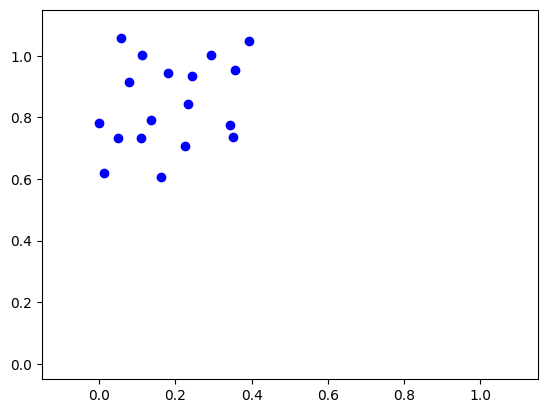

In [8]:
plt.scatter(blue_points[:,0], blue_points[:,1], color='blue')
plt.xlim(-0.15, 1.15)
plt.ylim(-0.05, 1.15)

In [9]:
mask = ~np.isin(points, blue_points).all(axis=1)
red_points = points[mask]

(-0.05, 1.15)

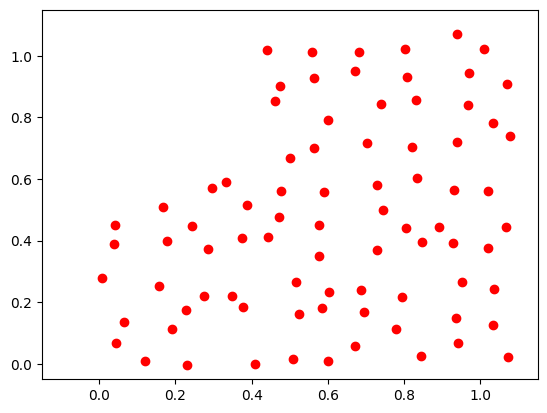

In [10]:
plt.scatter(red_points[:,0], red_points[:,1], color='red')
plt.xlim(-0.15, 1.15)
plt.ylim(-0.05, 1.15)

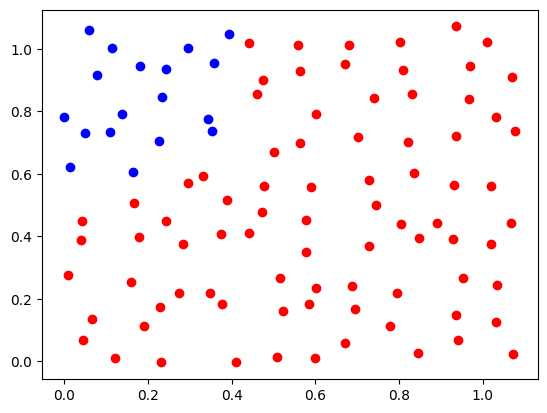

In [11]:
plt.scatter(blue_points[:,0], blue_points[:,1], color='blue')
plt.scatter(red_points[:,0], red_points[:,1], color='red')

In [12]:
y = []
for point in points:
    if point in red_points:
        y.append([0, 1])
    if point in blue_points:
        y.append([1, 0])

print(y)

[[0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [1, 0], [1, 0], [1, 0], [1, 0], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [1, 0], [1, 0], [1, 0], [1, 0], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1]]


In [ ]:
def sigmoid(x):
    x = np.clip(x, -15, 15)
    return 1 / (1 + np.exp(-x))

def d_sigmoid(x):
    sx = sigmoid(x)
    return sx * (1 - sx)

def tanh(x):
    x = np.clip(x, -15, 15)
    return np.tanh(x)

def d_tanh(x):
    tx = tanh(x)
    return 1 - tx**2

In [ ]:


class NeuralNetwork:
    def __init__(self, layer_dims):
        self.layer_dims = layer_dims
        self.num_layers = len(layer_dims) - 1
        self.weights = [np.random.randn(layer_dims[i], layer_dims[i+1]) * np.sqrt(2.0/(layer_dims[i]+layer_dims[i+1])) for i in range(self.num_layers)]
        self.biases = [np.zeros(layer_dims[i+1]) for i in range(self.num_layers)]

    def forward(self, x):
        a = x
        self.zs = []
        self.activations = [a]
        for i in range(self.num_layers):
            z = np.dot(a, self.weights[i]) + self.biases[i]
            self.zs.append(z)
            if i == self.num_layers - 1:
                a = sigmoid(z)
            else:
                a = tanh(z)
            self.activations.append(a)
        return a

    def compute_loss(self, y_true, y_pred):
        y_pred = np.clip(y_pred, 1e-8, 1 - 1e-8)
        return -np.mean(y_true * np.log(y_pred) + (1-y_true) * np.log(1-y_pred))

    def backward(self, x, y_true, learning_rate=0.01):
        y_pred = self.activations[-1]
        delta = y_pred - y_true
        grads_w = [None] * self.num_layers
        grads_b = [None] * self.num_layers
        for l in reversed(range(self.num_layers)):
            grads_w[l] = np.outer(self.activations[l], delta)
            grads_b[l] = delta
            if l > 0:
                delta = np.dot(self.weights[l], delta) * d_tanh(self.zs[l-1])
        for l in range(self.num_layers):
            self.weights[l] -= learning_rate * grads_w[l]
            self.biases[l] -= learning_rate * grads_b[l]
        return y_pred

    def fit(self, X, Y, epochs=200, learning_rate=0.01):
        for epoch in range(epochs):
            total_loss = 0
            for x, y_true in zip(X, Y):
                self.forward(x)
                self.backward(x, y_true, learning_rate)
                loss = self.compute_loss(y_true, self.activations[-1])
                total_loss += loss
            total_loss /= len(X)
            if epoch % 50 == 0:
                print(f"Epoch {epoch}/{epochs} Loss: {total_loss:.4f}")

In [46]:
nn = NeuralNetwork(2, 3, 2)
nn.set_hidden_neurons()

In [47]:
nn.num_all_layer_neurons

[2, 2, 2, 2, 2]

In [48]:
nn.initialize_weights()
nn.initialize_bias()

In [49]:
weights = []
weights = nn.weights
for i in weights:
    print(i)
    print()

[[0.49517691 0.03438852]
 [0.9093204  0.25877998]]

[[0.66252228 0.31171108]
 [0.52006802 0.54671028]]

[[0.18485446 0.96958463]
 [0.77513282 0.93949894]]

[[0.89482735 0.59789998]
 [0.92187424 0.0884925 ]]



In [51]:
bias = nn.bias
for i in bias:
    print(i)

[0.19598286 0.04522729]
[0.32533033 0.38867729]
[0.27134903 0.82873751]
[0.35675333 0.28093451]


In [52]:
print(points[0])

[0.04531427 0.06796733]


In [53]:
y_pred = nn.forward(points[0])
print(y_pred)
nn.calculate_loss(y[0], y_pred)

[0.86185443 0.68814416]


np.float64(1.176602110394188)

In [54]:
nn.all_layer_values

[array([0.04531427, 0.06796733]),
 array([0.28022552, 0.06437416]),
 array([0.56960151, 0.51608799]),
 array([0.97110488, 0.848379  ]),
 array([0.72533967, 0.70022699]),
 array([0.94820022, 2.18987822]),
 array([0.72075308, 0.89933688]),
 array([1.8307784 , 0.79145733]),
 array([0.86185443, 0.68814416])]

In [55]:
nn.preact

[array([0.28022552, 0.06437416]),
 array([0.97110488, 0.848379  ]),
 array([0.94820022, 2.18987822])]

In [56]:
nn.aftact

[array([0.56960151, 0.51608799]),
 array([0.72533967, 0.70022699]),
 array([0.72075308, 0.89933688])]

In [57]:
for i in range(10):
    print(points[i], y[i])

[0.04531427 0.06796733] [0, 1]
[0.06473172 0.13577409] [0, 1]
[0.00769037 0.27796893] [0, 1]
[0.03913065 0.38939614] [0, 1]
[0.0430464 0.4502481] [0, 1]
[0.01439226 0.62053512] [1, 0]
[0.04906881 0.73225633] [1, 0]
[-4.45382762e-04  7.83587757e-01] [1, 0]
[0.07767525 0.91624394] [1, 0]
[0.05803444 1.05952167] [1, 0]


In [ ]:
fit(points, y, epochs=200, learning_rate=0.01)

In [58]:
epochs = 1000
l = []
for epoch in range(epochs):
    for (point, label) in zip(points, y):
        y_pred = nn.forward(point)
        loss = nn.calculate_loss(label, y_pred)
        nn.backward(label, y_pred)
        nn.update_weights(0.01)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss}")
    l.append(loss)

Epoch 1/1000, Loss: 1.1686881757057281
Epoch 2/1000, Loss: 1.1573299009270286
Epoch 3/1000, Loss: 1.1490112000744883
Epoch 4/1000, Loss: 1.1410644145456177
Epoch 5/1000, Loss: 1.1322303554175803
Epoch 6/1000, Loss: 1.122303023012489
Epoch 7/1000, Loss: 1.1114363975265102
Epoch 8/1000, Loss: 1.0999316968542798
Epoch 9/1000, Loss: 1.0881536289813087
Epoch 10/1000, Loss: 1.0764728220838455
Epoch 11/1000, Loss: 1.0652183356030998
Epoch 12/1000, Loss: 1.0546446542756442
Epoch 13/1000, Loss: 1.0449178315256087
Epoch 14/1000, Loss: 1.036119533175778
Epoch 15/1000, Loss: 1.0282627845270031
Epoch 16/1000, Loss: 1.021312066524908
Epoch 17/1000, Loss: 1.0152022454371814
Epoch 18/1000, Loss: 1.0098535652967509
Epoch 19/1000, Loss: 1.005182110352791
Epoch 20/1000, Loss: 1.001106333542121
Epoch 21/1000, Loss: 0.9975506479739371
Epoch 22/1000, Loss: 0.9944470420455088
Epoch 23/1000, Loss: 0.9917354742462979
Epoch 24/1000, Loss: 0.9893635784262005
Epoch 25/1000, Loss: 0.9872860238143373
Epoch 26/1000,

C:\Users\umash\AppData\Local\Temp\ipykernel_10776\2738379530.py:47: RuntimeWarning: overflow encountered in power
  return 1/ (1 + np.e**(-x))


Epoch 594/1000, Loss: 0.9714824987766396
Epoch 595/1000, Loss: 0.9714824987766396
Epoch 596/1000, Loss: 0.9714824987766396
Epoch 597/1000, Loss: 0.9714824987766396
Epoch 598/1000, Loss: 0.9714824987766396
Epoch 599/1000, Loss: 0.9714824987766396
Epoch 600/1000, Loss: 0.9714824987766396
Epoch 601/1000, Loss: 0.9714824987766396
Epoch 602/1000, Loss: 0.9714824987766396
Epoch 603/1000, Loss: 0.9714824987766396
Epoch 604/1000, Loss: 0.9714824987766396
Epoch 605/1000, Loss: 0.9714824987766396
Epoch 606/1000, Loss: 0.9714824987766396
Epoch 607/1000, Loss: 0.9714824987766396
Epoch 608/1000, Loss: 0.9714824987766396
Epoch 609/1000, Loss: 0.9714824987766396
Epoch 610/1000, Loss: 0.9714824987766396
Epoch 611/1000, Loss: 0.9714824987766396
Epoch 612/1000, Loss: 0.9714824987766396
Epoch 613/1000, Loss: 0.9714824987766396
Epoch 614/1000, Loss: 0.9714824987766396
Epoch 615/1000, Loss: 0.9714824987766396
Epoch 616/1000, Loss: 0.9714824987766396
Epoch 617/1000, Loss: 0.9714824987766396
Epoch 618/1000, 

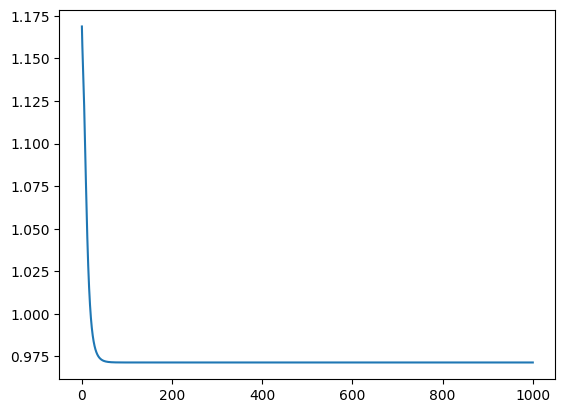

In [59]:
x = np.linspace(0, epochs, epochs)
y_l = np.array(l)
plt.plot(x, y_l)

In [60]:
#bluepoints [1, 0]
#redpoints [0, 1]

In [61]:
y_p = nn.forward(blue_points[6])
y_p

C:\Users\umash\AppData\Local\Temp\ipykernel_10776\2738379530.py:47: RuntimeWarning: overflow encountered in power
  return 1/ (1 + np.e**(-x))


array([0.77413717, 0.63436069])